In [128]:
from IPython.core.display import HTML, Markdown, display

import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
from cycler import cycler
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
from celluloid import Camera
import ipywidgets as widgets
from matplotlib.patches import Polygon
from matplotlib.gridspec import GridSpec

class Caption:
    def __init__(self, fig_no, text, c_type='f'):
        self.fig_no = fig_no
        self.text = text
        if c_type=='t':
            self.c_type = 'Table'
        else:
            self.c_type = 'Figure'
    
    def _repr_html_(self):
        return f"<div class=\"alert alert-info\" role=\"alert\"><b>{ self.c_type } { self.fig_no }</b>. { self.text }</div>"

# Lab 1: Signal Detection Theory

```{note}
This chapter authored by [David Heeger](https://www.cns.nyu.edu/~david/) and [Todd M. Gureckis](http://gureckislab.org/~gureckis) and is released under the [license](/LICENSE.html) for the book.  The original text drawn from the lecture notes posted [here](https://www.cns.nyu.edu/~david/handouts/sdt/sdt.html).
```

## Overview

The starting point for signal detection theory is that nearly all reasoning and decision making takes place in the presence of some uncertainty. Signal detection theory provides a precise language and graphical notation for analyzing decision making in the presence of uncertainty. The general approach of signal detection theory has direct application for us in terms of sensory experiments. But it also offers a way to analyze many different kinds of decision problems.

More specifically, signal detection theory is a way to quantify that ability to distinguish between stimuli or signals associated with some pattern and those associated with noise.  The basic structure of signal detection theory is related to the hypothesis testing ideas we covered in previous chapters in the sense that it is ultimately about decision making in the context of uncertainty.

Signal detection theory was original developed by electrical engineers working in the fields of radar detection.  Later it was used by perceptual psychologists (in particular John Swets and David Green) as a framework for the analysis of human behavior in the field of psychophysics.  It is also frequently used to analyze patterns of memory performance (e.g., recognition memory).  Finally, signal detection concepts are still used in many engineering fields including measuring the performance of many types of machine learning artificial intellgience systems.  

Therefore, learning a bit about signal detection theory provides you with a very general tool for making decisions in the context of noisy signals.

### Terms you should be familiar with after reading this chapter

- Information acquisition
- Criterion
- Internal response and external noise
- Probability of occurrence curves
- Receiver operating characteristic (ROC curve)
- Discriminability index (d')

## Information and Criterion

We begin here with medical scenario. Imagine that a radiologist is examining a CT scan, looking for evidence of a tumor. Interpreting CT images is hard and it takes a lot of training. Because the task is so hard, there is always some uncertainty as to what is there or not. Either there is a tumor (signal present) or there is not (signal absent). Either the doctor sees a tumor (they respond "yes'') or does not (they respond "no''). There are four possible outcomes: 

_ | tumor present | tumor absent
--- | ---|---
**doctor says "yes"** | hit | false alarm
**doctor says "no"** | miss | correct rejection

Hits and correct rejections are good. False alarms and misses are bad.
There are two main components to the decision-making process: information acquisition and criterion.  


### Information acquisition  

First, there is information in the CT scan. For example, healthy lungs have a characteristic shape. The presence of a tumor might distort that shape. Tumors may have different image characteristics: brighter or darker, different texture, etc. With proper training a doctor learns what kinds of things to look for, so with more practice/training they will be able to acquire more (and more reliable) information. Running another test (e.g., MRI) can also be used to acquire more information. Regardless, acquiring more information is good. The effect of information is to increase the likelihood of getting either a hit or a correct rejection, while reducing the likelihood of an outcome in the two error boxes.

### Criterion 
The second component of the decision process is quite different. For, in addition to relying on technology/testing to provide information, the medical profession allows doctors to use their own judgement. Different doctors may feel that the different types of errors are not equal. For example, some doctors may feel that missing an opportunity for early diagnosis may mean the difference between life and death. A false alarm, on the other hand, may result only in a routine biopsy operation. They may choose to err toward "yes" (tumor present) decisions. Other doctors, however, may feel that unnecessary surgeries (even routine ones) are very bad (expensive, stress, etc.). They may chose to be more conservative and say "no" (no turmor) more often. They will miss more tumors, but they will be doing their part to reduce unnecessary surgeries. And they may feel that a tumor, if there really is one, will be picked up at the next check-up. These arguments are not about information. Two doctors, with equally good training, looking at the same CT scan, will have the same information. But they may have a different bias/criterion.

## Internal Response and Internal Noise

Detecting a tumor is hard and there will always be some amount of uncertainty. There are two kinds of noise factors that contribute to the uncertainty: internal noise and external noise.

### External noise 

There are many possible sources of external noise. There can be noise factors that are part of the photographic process, a smudge, or a bad spot on the film. Or something in the person's lung that is fine but just looks a bit like a tumor. All of these are to be examples of external noise. While the doctor makes every effort possible to reduce the external noise, there is little or nothing that they can do to reduce internal noise.

### Internal noise

Internal noise refers to the fact that neural responses are noisy. To make this example really concrete, let's suppose that our doctor has a set of tumor detector neurons and that they monitor the response of one of these neurons to determine the likelihood that there is a tumor in the image (if we could find these neurons then perhaps we could publish and article entitled "What the radiologist's eye tells the radiologist's brain"). These hypothetical tumor detectors will give noisy and variable responses. After one glance at a scan of a healthy lung, our hypothetical tumor detectors might fire 10 spikes per second. After a different glance at the same scan and under the same conditions, these neurons might fire 40 spikes per second.

### Internal response 
Now we do not really believe that there are tumor detector neurons in a radiologist's brain. But there is some internal state, reflected by neural activity somewhere in the brain, that determines the doctor's impression about whether or not a tumor is present. This is a fundamental issue; the state of your mind is reflected by neural activity somewhere in your brain. This neural activity might be concentrated in just a few neurons or it might be distributed across a large number of neurons. Since we do not know much about where/when this neural activity is, let's simply refer to it as the doctor's internal response.

This internal response is inherently noisy. Even when there is no tumor present (no-signal trials) there will be some internal response (sometimes more, sometimes less) in the doctor's sensory system.

## Probability of Occurrence Curves

Figure 1 shows a graph of two hypothetical internal response curves.  The curve on the left is for the noise-alone (healthy lung) trials, and the curve on the right is for the signal-plus-noise (tumor present) trials. The horizontal axis is labeled internal response and the vertical axis is labeled probability. The height of each curve represents how often that level of internal response will occur. For example, on noise-alone trials, there will generally be about 10 units of internal response: very little. However, there will be some trials with more (or less) internal response because of the internal noise.  These curves have the shape of a normal distribution which we covered in previous chapter. 

Notice that we never lose the noise. The internal response for the signal-plus-noise case is generally greater but there is still a distribution (a spread) of possible responses. Notice also that the curves overlap, that is, the internal response for a noise-alone trial may (in some cases) exceed the internal response for a signal-plus-noise trial.

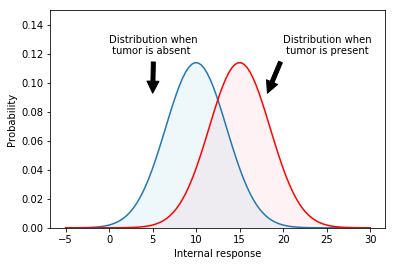

In [202]:
x = np.linspace(-5,30,100)
x2 = np.linspace(-5,30,100)
y=stats.norm.pdf(x, 10,3.5)
y2=stats.norm.pdf(x2,15,3.5)

plt.plot(x,y)
plt.plot(x2,y2,color='r')
plt.ylim(0,0.15)
plt.ylabel("Probability")
plt.xlabel("Internal response")
plt.fill_between(x2,y2, where=y>0.0,interpolate=True,facecolor='pink',alpha=0.2)
plt.fill_between(x,y, where=y>0.0,interpolate=True,facecolor='lightblue',alpha=0.2)


plt.annotate("Distribution when\n tumor is present", xy=(18,0.09),xytext=(20,0.12),arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate("Distribution when\n tumor is absent", xy=(5,0.09),xytext=(0,0.12),arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()
display(Caption(1.0, "Internal response probability of occurrence curves for noise-alone (blue) and for signal-plus-noise (red) trials."))

Just to be really concrete, we could mlabel the horizontal axis in units of firing rate (10, 20, 30,..., etc. spikes per second). This would mean that on a noise-alone (no tumor) trial, it is most likely that the internal response would be 10 spikes per second. It is also rather likely that the internal response would be 5 or 15 spikes per second. But it is very unlikely that the internal response would be 25 spikes per second when no tumor is present. Because we want to remain noncommittal about what and where in the brain the internal response is, we did not label the horizontal axis in terms of firing rates. The internal response is in some unknown, but in principle quantifiable, units.

### The role of the criterion

Perhaps the simplest decision strategy that the doctor can adopt is to pick a criterion location along the internal response axis. Whenever the internal response is greater than this criterion they respond "yes". Whenever the internal response is less than this criterion they respond "no".

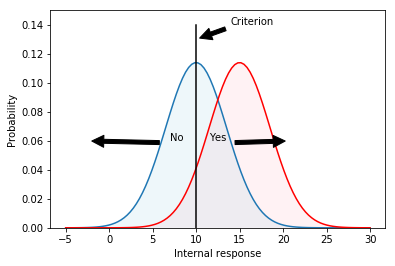

In [12]:
x = np.linspace(-5,30,100)
x2 = np.linspace(-5,30,100)
y=stats.norm.pdf(x, 10,3.5)
y2=stats.norm.pdf(x2,15,3.5)

plt.plot(x,y)
plt.plot(x2,y2,color='r')
plt.ylim(0,0.15)
plt.ylabel("Probability")
plt.xlabel("Internal response")
plt.fill_between(x2,y2, where=y>0.0,interpolate=True,facecolor='pink',alpha=0.2)
plt.fill_between(x,y, where=y>0.0,interpolate=True,facecolor='lightblue',alpha=0.2)
plt.plot([10,10],[0,0.14],color='k')

plt.annotate("Yes", xy=(21,0.06),xytext=(11.5,0.06),arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate("No", xy=(-3,0.06),xytext=(7,0.06),arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate("Criterion", xy=(10,0.13),xytext=(14,0.14),arrowprops=dict(facecolor='black', shrink=0.1))


plt.show()
display(Caption(2.0, "Internal response probability of occurrence curves for noise-alone (blue) and signal-plus-noise (red) trials. Since the curves overlap, the internal response for a noise-alone trial may exceed the internal response for a signal-plus-noise trial. Vertical line correspond to the criterion response.  Any observation that falls to the right of the criterion is assigned the 'yes - tumor present' response.  Any value to the left is assigned the 'no - tumor absent' response. Overlap in the distributions show cases where things can be confused."))

An example criterion is indicated by the vertical line in Figure 2. The criterion line effectively divides the graph into four sections that correspond to: hits, misses, false alarms, and correct rejections.   Let's define these terms:

- A **hit** refers to a signal which is classified as a tumor when it is in fact a tumor.
- A **miss** refers to a signal which is classified as not a tumor (because it falls on the left side of the criterion) but is in fact a tumor.  The doctors missed the diagnosis.
- A **false alarm** is a case where no tumor was in the signal but the signal fell to the right of the criterion.  This means the patient would be told they have a tumor when in fact they don't.
- A **correct rejection** is a case where there is no tumor and because the signal fell to the left of the criterion, the doctor made the correct decision to tell the patient they do not have a tumor.

To summarize, on both hits and false alarms, the internal response is greater than the criterion, because the doctor is responding "yes''. Hits correspond to signal-plus-noise trials when the internal response is greater than criterion, as indicated in the figure. False alarms correspond to noise-alone trials when the internal response is greater than criterion.

To get a better sense of the corresponance between these terms and the graphs we have been considering, try out the following interactive plot (Figure 3) which highlight different regions:

In [86]:
@widgets.interact(show_opt=widgets.Select(
    options=['hits', 'misses', 'false alarms', 'correct rejections'],
    value='hits',
    # rows=10,
    description='show me:',
    disabled=False
))
def plot_option(show_opt):
    x = np.linspace(-5,30,100)
    x2 = np.linspace(-5,30,100)
    y=stats.norm.pdf(x, 10,3.5)
    y2=stats.norm.pdf(x2,15,3.5)

    plt.plot(x,y)
    plt.plot(x2,y2,color='r')
    plt.ylim(0,0.15)
    plt.ylabel("Probability")
    plt.xlabel("Internal response")
    
    if show_opt == 'hits':
        ix = np.linspace(10,30)
        iy = stats.norm.pdf(ix,15,3.5)
        verts = [(10, 0), *zip(ix, iy), (30, 0)]
        poly = Polygon(verts, facecolor='pink',alpha=0.2,hatch='/',edgecolor='r')
        plt.gca().add_patch(poly)
        plt.annotate("hits", xy=(15,0.06),xytext=(15,0.06))
    elif show_opt == 'misses':
        ix = np.linspace(-5,10)
        iy = stats.norm.pdf(ix,15,3.5)
        verts = [(-5, 0), *zip(ix, iy), (10, 0)]
        poly = Polygon(verts, facecolor='pink',alpha=0.2,hatch='/',edgecolor='r')
        plt.gca().add_patch(poly)
        plt.annotate("misses", xy=(6,0.01),xytext=(6,0.01))
    elif show_opt == 'false alarms':
        ix = np.linspace(10,30)
        iy = stats.norm.pdf(ix,10,3.5)
        verts = [(10, 0), *zip(ix, iy), (30, 0)]
        poly = Polygon(verts, facecolor='lightblue',alpha=0.2,hatch='/',edgecolor='b')
        plt.gca().add_patch(poly)
        plt.annotate("false alarms", xy=(11,0.01),xytext=(11,0.01))
    elif show_opt == 'correct rejections':
        ix = np.linspace(-5,10)
        iy = stats.norm.pdf(ix,10,3.5)
        verts = [(-5, 0), *zip(ix, iy), (10, 0)]
        poly = Polygon(verts, facecolor='lightblue',alpha=0.2,hatch='/',edgecolor='b')
        plt.gca().add_patch(poly)
        plt.annotate("correct rejections", xy=(5,0.01),xytext=(5,0.01))

    plt.plot([10,10],[0,0.14],color='k')
    plt.annotate("Criterion", xy=(10,0.13),xytext=(14,0.14),arrowprops=dict(facecolor='black', shrink=0.1))
    plt.show()

display(Caption(3.0, "Interactive plot showing the different parts of the distributions corresponding to the hits, misses, false alarms, and correct rejections."))

interactive(children=(Select(description='show me:', options=('hits', 'misses', 'false alarms', 'correct rejec…

Suppose that the doctor chooses a low criterion (Figure 4, top), so that they respond "yes'' to almost everything. Then they will never miss a tumor when it is present and they will therefore have a very high hit rate. On the other hand, saying "yes'' to almost everything will greatly increase the number of false alarms (potentially leading to unnecessary surgeries). Thus, there is a clear cost to increasing the number of hits, and that cost is paid in terms of false alarms. If the doctor chooses a high criterion (Figure 4, bottom) then they respond "no'' to almost everything. They will rarely make a false alarm, but they will also miss many real tumors.



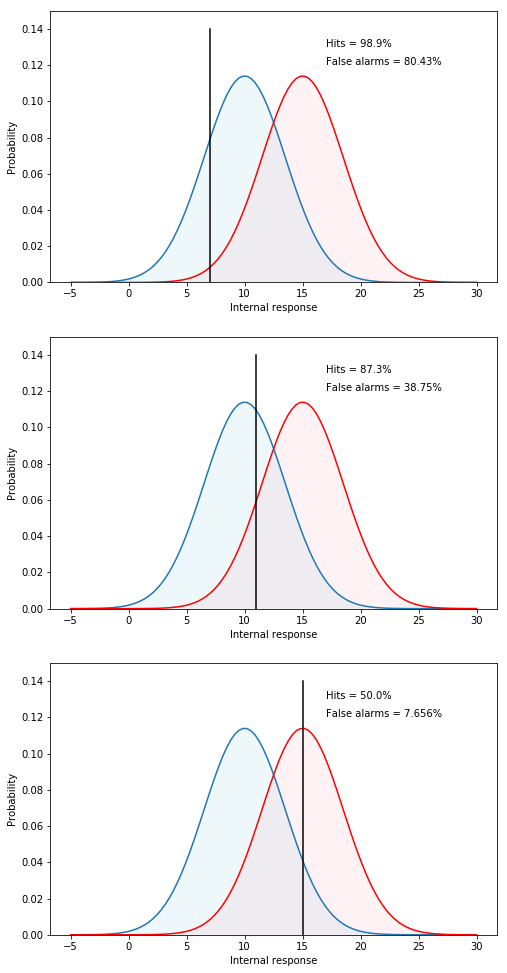

In [122]:
fig, ax = plt.subplots(3,1,figsize=(8,17))

x = np.linspace(-5,30,100)
x2 = np.linspace(-5,30,100)
y=stats.norm.pdf(x, 10,3.5)
y2=stats.norm.pdf(x2,15,3.5)

# low threshold
ax[0].plot(x,y)
ax[0].plot(x2,y2,color='r')
ax[0].set_ylim(0,0.15)
ax[0].set_ylabel("Probability")
ax[0].set_xlabel("Internal response")
ax[0].fill_between(x2,y2, where=y>0.0,interpolate=True,facecolor='pink',alpha=0.2)
ax[0].fill_between(x,y, where=y>0.0,interpolate=True,facecolor='lightblue',alpha=0.2)
ax[0].plot([7,7],[0,0.14],color='k')

hits = 1.0-stats.norm.cdf(7, loc=15, scale=3.5)
fas = 1.0-stats.norm.cdf(7, loc=10, scale=3.5)
ax[0].annotate(f"Hits = {hits*100:.3}%", xy=(17,0.13),xytext=(17,0.13))
ax[0].annotate(f"False alarms = {fas*100:.4}%", xy=(17,0.12),xytext=(17,0.12))


# middle threshold
ax[1].plot(x,y)
ax[1].plot(x2,y2,color='r')
ax[1].set_ylim(0,0.15)
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Internal response")
ax[1].fill_between(x2,y2, where=y>0.0,interpolate=True,facecolor='pink',alpha=0.2)
ax[1].fill_between(x,y, where=y>0.0,interpolate=True,facecolor='lightblue',alpha=0.2)
ax[1].plot([11,11],[0,0.14],color='k')

hits = 1.0-stats.norm.cdf(11, loc=15, scale=3.5)
fas = 1.0-stats.norm.cdf(11, loc=10, scale=3.5)
ax[1].annotate(f"Hits = {hits*100:.3}%", xy=(17,0.13),xytext=(17,0.13))
ax[1].annotate(f"False alarms = {fas*100:.4}%", xy=(17,0.12),xytext=(17,0.12))


# high threshold
ax[2].plot(x,y)
ax[2].plot(x2,y2,color='r')
ax[2].set_ylim(0,0.15)
ax[2].set_ylabel("Probability")
ax[2].set_xlabel("Internal response")
ax[2].fill_between(x2,y2, where=y>0.0,interpolate=True,facecolor='pink',alpha=0.2)
ax[2].fill_between(x,y, where=y>0.0,interpolate=True,facecolor='lightblue',alpha=0.2)
ax[2].plot([15,15],[0,0.14],color='k')

hits = 1.0-stats.norm.cdf(15, loc=15, scale=3.5)
fas = 1.0-stats.norm.cdf(15, loc=10, scale=3.5)
ax[2].annotate(f"Hits = {hits*100:.3}%", xy=(17,0.13),xytext=(17,0.13))
ax[2].annotate(f"False alarms = {fas*100:.4}%", xy=(17,0.12),xytext=(17,0.12))

plt.show()
display(Caption(4.0, "Effect of shifting the criterion on the proportion of hits and false alarms."))

Notice that there is no way that the doctor can set their criterion to achieve only hits and no false alarms. The message that you should be taking home from this is that it is inevitable that some mistakes will be made. Because of the noise it is simply a true, undeniable, fact that the internal responses on noise-alone trials may exceed the internal responses on signal-plus-noise trials, in some instances. Thus a doctor cannot always be right. They can adjust the kind of errors that they make by manipulating their criterion, the one part of this diagram that is under their control.

## The Receiver Operating Characteristic

We can describe the full range of the doctor's options in a single curve, called an ROC curve, which stands for receiver-operating characteristic. The ROC curve captures, in a single graph, the various alternatives that are available to the doctor as they move their criterion to higher and lower levels.
ROC curves (Figure 5) are plotted with the false alarm rate on the horizontal axis and the hit rate on the vertical axis. The figure shows several different ROC curves, each corresponding to a different signal strengths. Just pay attention to one of them (the curve labeled d'=1) for the time being. We already know that if the criterion is very high, then both the false alarm rate and the hit rate will be very low, putting you somewhere near the lower left corner of the ROC graph. If   the criterion is very low, then both the hit rate and the false alarm rate will be very high, putting you somewhere near the upper right corner of the graph.  For an intermediate choice of criterion, the hit rate and false alarm rate will take on intermediate values. The ROC curve characterizes the choices available to the doctor. They may set the criterion anywhere, but any choice that they make will land them with a hit and false alarm rate somewhere on the ROC curve. Notice also that for any reasonable choice of criterion, the hit rate is always larger than the false alarm rate, so the ROC curve is bowed upward.

In [160]:
(11-10)/1.0

1.0

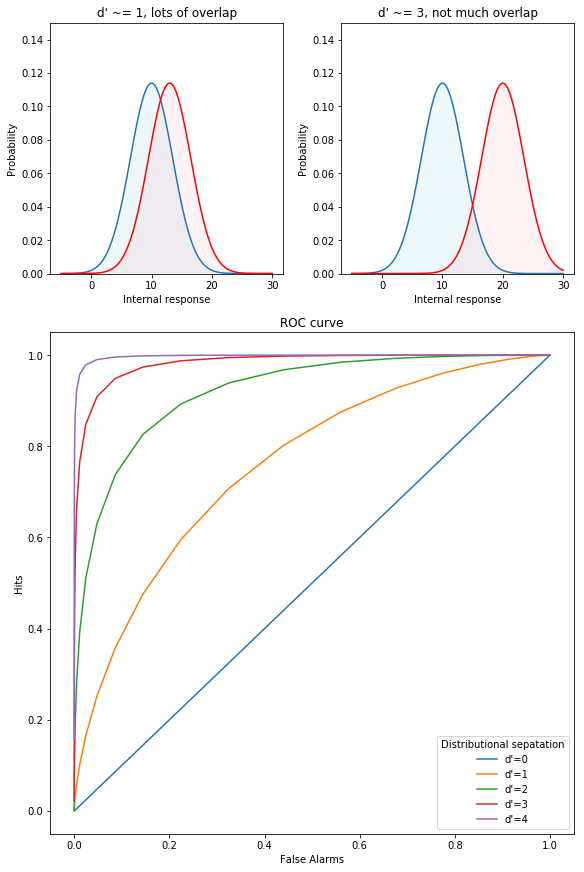

In [174]:
fig = plt.figure(constrained_layout=True, figsize=(8,12))

x = np.linspace(-5,30,100)
x2 = np.linspace(-5,30,100)
y=stats.norm.pdf(x, 10,3.5)
y2=stats.norm.pdf(x2,13,3.5)
y3=stats.norm.pdf(x,20,3.5)


gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1:3, :])

ax1.plot(x,y)
ax1.plot(x2,y2,color='r')
ax1.set_ylim(0,0.15)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Internal response")
ax1.fill_between(x2,y2, where=y>0.0,interpolate=True,facecolor='pink',alpha=0.2)
ax1.fill_between(x,y, where=y>0.0,interpolate=True,facecolor='lightblue',alpha=0.2)
ax1.set_title("d' ~= 1, lots of overlap")


ax2.plot(x,y)
ax2.plot(x,y3,color='r')
ax2.set_ylim(0,0.15)
ax2.set_ylabel("Probability")
ax2.set_xlabel("Internal response")
ax2.fill_between(x,y3, where=y>0.0,interpolate=True,facecolor='pink',alpha=0.2)
ax2.fill_between(x,y, where=y>0.0,interpolate=True,facecolor='lightblue',alpha=0.2)
ax2.set_title("d' ~= 3, not much overlap")


(11-10)/1.0

d0_p = np.array([[10,1.0], [10,1.0]])
d1_p = np.array([[11,1.0], [10,1.0]])
d2_p = np.array([[12,1.0], [10,1.0]])
d3_p = np.array([[13,1.0], [10,1.0]])
d4_p = np.array([[14,1.0], [10,1.0]])

for idx, params in enumerate([d0_p, d1_p, d2_p, d3_p, d4_p]):
    fas_a = []
    hits_a = []
    for criterion in np.linspace(-15,15,100):
        hits = 1.0-stats.norm.cdf(criterion, loc=params[0,0], scale=params[0,1])
        fas = 1.0-stats.norm.cdf(criterion, loc=params[1,0], scale=params[1,1])
        hits_a.append(hits)
        fas_a.append(fas)
    ax3.plot(fas_a, hits_a, label=f"d'={idx}")

ax3.set_ylabel("Hits")
ax3.set_xlabel("False Alarms")
ax3.set_title("ROC curve")

plt.legend(loc='lower right',title="Distributional sepatation")

plt.show()

display(Caption(5.0, 'Internal response probability of occurrence curves and ROC curves for different signal strengths. When the signal is stronger there is less overlap in the probability of occurrence curves, and the ROC curve becomes more bowed.'))

## The role of information

Acquiring more information makes the decision easier. Running another test (e.g., MRI) can be used to acquire more information about the presence or absence of a tumor. Unfortunately, the radiologist does not have much control over how much information is available.

In a controlled perception experiment the experimenter has complete control over how much information is provided. Having this control allows for quite a different sort of outcome. If the experimenter chooses to present a stronger stimulus, then the subject's internal response strength will, on the average, be stronger. Pictorially, this will have the effect of shifting the probability of occurrence curve for signal-plus-noise trials to the right, a bit further away from the noise-alone probability of occurrence curve.

Figure 5 shows two sets of probability of occurrence curves. When the signal is stronger there is more separation between the two probability of occurrence curves. When this happens the subject's choices are not so difficult as before. They can pick a criterion to get nearly a perfect hit rate with almost no false alarms. ROC curves for stronger signals bow out further than ROC curves for weaker signals. Ultimately, if the signal is really strong (lots of information), then the ROC curve goes all the way up to the upper left corner (all hits and no false alarms).

## Varying the noise

There is another aspect of the probability of occurrence curves that also determines detectability: the amount of noise. Less noise reduces the spread of the curves. For example, consider the two probability of occurrence curves in Figure 6. The separation between the peaks is the same but the second set of curves are much skinnier. Clearly, the signal is much more discriminable when there is less spread (less noise) in the probability of occurrence curves. So the subject would have an easier time setting their criterion in order to be right nearly all the time.

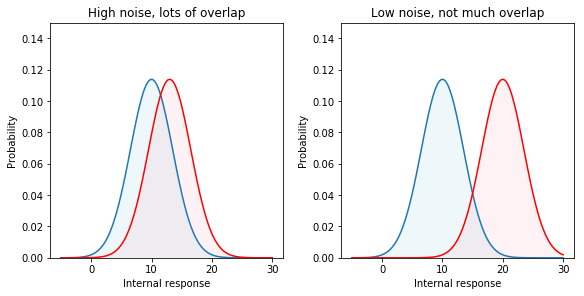

In [200]:
fig = plt.figure(constrained_layout=True, figsize=(8,4))

x = np.linspace(-5,30,100)
x2 = np.linspace(-5,30,100)
y=stats.norm.pdf(x, 10,3.5)
y2=stats.norm.pdf(x2,13,3.5)
y3=stats.norm.pdf(x,20,3.5)


gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax1.plot(x,y)
ax1.plot(x2,y2,color='r')
ax1.set_ylim(0,0.15)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Internal response")
ax1.fill_between(x2,y2, where=y>0.0,interpolate=True,facecolor='pink',alpha=0.2)
ax1.fill_between(x,y, where=y>0.0,interpolate=True,facecolor='lightblue',alpha=0.2)
ax1.set_title("High noise, lots of overlap")


ax2.plot(x,y)
ax2.plot(x,y3,color='r')
ax2.set_ylim(0,0.15)
ax2.set_ylabel("Probability")
ax2.set_xlabel("Internal response")
ax2.fill_between(x,y3, where=y>0.0,interpolate=True,facecolor='pink',alpha=0.2)
ax2.fill_between(x,y, where=y>0.0,interpolate=True,facecolor='lightblue',alpha=0.2)
ax2.set_title("Low noise, not much overlap")

plt.show()

display(Caption(6.0, 'Internal response probability of occurrence curves for two different noise levels. When the noise is greater, the curves are wider (more spread) and there is more overlap.'))

In reality, we have no control over the amount of internal noise. But it is important to realize that decreasing the noise has the same effect as increasing the signal strength. Both reduce the overlap between the probability of occurrence curves.

### Discriminability index ($d'$):
Thus, the discriminability of a signal depends both on the separation and the spread of the noise-alone and signal-plus-noise curves. Discriminability is made easier either by increasing the separation (stronger signal) or by decreasing the spread (less noise). In either case, there is less overlap between the probability of occurrence curves. To write down a complete description of how discriminable the signal is from no-signal, we want a formula that captures both the separation and the spread. The most widely used measure is called d-prime ($d'$), and its formula is simply:

$$ d' = \frac{separation}{spread} $$

This number, $d'$, is an estimate of the strength of the signal. Its primary virtue, and the reason that it is so widely used, is that its value does not depend upon the criterion the subject is adopting, but instead it is a true measure of the internal response.

### Estimating $d'$: 
To recap... Increasing the stimulus strength separates the two (noise-alone versus signal-plus-noise) probability of occurrence curves. This has the effect of increasing the hit and correct rejection rates. Shifting to a high criterion leads to fewer false alarms, fewer hits, and fewer surgical procedures. Shifting to a low criterion leads to more hits (lots of worthwhile surgeries), but many false alarms (unnecessary surgeries) as well. The discriminability index, $d'$, is a measure of the strength of the internal response that is independent of the criterion.

But how do we measure $d'$? The trick is that we have to measure both the hit rate and the false alarm rate, then we can read-off $d'$ from an ROC curve. Figure 5 shows a family of ROC curves. Each of these curves corresponds to a different d-prime value; $d'=0$, $d'=1$, etc. As the signal strength increases, the internal response increases, the ROC curve bows out more, and d' increases.

So let's say that we do a detection experiment; we ask our doctor to detect tumors in 1000 CT scans. Some of these patients truly had tumors and some of them didn't. We only use patients who have already had surgery (biopsies) so we know which of them truly had tumors. We count up the number of hits and false alarms. And that drops us somewhere on this plot, on one of the ROC curves. Then we simply read off the $d'$ value corresponding to that ROC curve. Notice that we need to know both the hit rate and the false alarm rate to get the discriminability index, $d'$.

### Medical Malpractice Example

A study of doctors' performance was performed in Boston. 10,000 cases were analyzed by a special commission. The commission decided which were handled negligently and which well. They found that 100 were handled very badly and there is good cause for a malpractice suit. Of these 100, only 20 cases were pursued. What should we conclude?

Ralph Nader and others concluded that doctors are not being sued enough. But this conclusion was based on only partial information (hits and misses). I did not tell you what happened in the other 9900 cases. How many law suits were there in those cases? What if there were many (e.g., 9000 out of 9900) false alarms? The AMA concluded that doctors are being sued too much. 